<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Final/CNNAE_10x10_8_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy
import time
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense,  Reshape, GaussianNoise, BatchNormalization, Conv1D, Activation, Lambda, Flatten

from tensorflow.keras import Model
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical





input_block_length = 10
num_of_input_block = 10
input_message_length = input_block_length * num_of_input_block 
encoder_output_length = 8
channel_size = 10 


NUM_OF_INPUT_MESSAGE = 1000
SNR_STEP_SIZE = .5

SNR_BEGIN = 0
SNR_END = 10

bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]

bler_per_iter_ldpc_50_100_itpp_psk_4 = [1., 1., 0.997, 0.989, 0.92,  0.697, 0.391, 0.123, 0.042, 0.011, 0.,    0.,  0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]
bler_per_iter_uncoded_100_itpp_psk_4 = [1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.997, 0.991, 0.97,  0.948, 0.924, 0.821, 0.74,  0.566, 0.444, 0.296, 0.211, 0.136]
bler_per_iter_uncoded_50_itpp_psk_4 = [1.,    1.,    1.,    1.,    .998,    .986,    .987,    0.974, 0.936, 0.912,  0.859, 0.785, 0.7, 0.602,  0.488, 0.329, 0.255, 0.168, 0.125, 0.061]
bler_per_iter_uncoded_50_itpp_psk_2 = [0.982, 0.964, 0.94,  0.9,   0.861, 0.773, 0.682, 0.565, 0.478, 0.359, 0.248, 0.169, 0.105, 0.074, 0.037, 0.016, 0.011, 0.003, 0.001, 0.   ]
bler_per_iter_uncoded_100_itpp_psk_2 = [0.999, 0.999, 0.995, 0.992, 0.975, 0.939, 0.898, 0.841, 0.72,  0.57,  0.44,  0.312, 0.209, 0.131, 0.071, 0.036, 0.017, 0.013, 0.003, 0.002]

ber_per_iter_ldpc_50_100_itpp_psk_4 = [0.21282, 0.20112, 0.18674, 0.16894, 0.15726, 0.14026, 0.1274, 0.11118, 0.0886,
 0.06074, 0.03002, 0.01486, 0.00372, 0.0003 , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.    , 0.     , 0.,
 0.     ] 
ber_per_iter_uncoded_50_itpp_psk_2 = [1.2920e-01, 1.1560e-01, 1.0574e-01, 9.3500e-02, 8.1340e-02, 6.6180e-02,
 5.7260e-02, 4.7700e-02, 3.8560e-02, 2.9580e-02, 2.3500e-02, 1.6280e-02,
 1.2500e-02, 8.5000e-03, 6.5200e-03, 3.8000e-03, 2.3800e-03, 1.2600e-03,
 9.0000e-04, 4.2000e-04, 8.0000e-05, 8.0000e-05, 4.0000e-05, 4.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]
ber_per_iter_uncoded_100_itpp_psk_2 = [1.3108e-01, 1.1509e-01, 1.0292e-01, 9.0680e-02, 7.8550e-02, 6.6490e-02,
 5.5550e-02, 4.6650e-02, 3.7450e-02, 2.9480e-02, 2.2790e-02, 1.8000e-02,
 1.2360e-02, 8.4600e-03, 6.1900e-03, 4.0100e-03, 2.6000e-03, 1.5000e-03,
 7.7000e-04, 4.9000e-04, 2.6000e-04, 5.0000e-05, 5.0000e-05, 2.0000e-05,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]


bler_per_iter_ldpc_100_200_itpp_psk_4 = [1.   , 1., 1., 1., 1., 1., 1., 1., 0.984, 0.8, 0.338, 0.077,
 0.006, 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0., 0., 0., 0., 0., 0.   , 0. , 0.   , 0.,
 0.   , 0., 0., 0. ]

ber_per_iter_ldpc_100_200_itpp_psk_4 = [0.21407, 0.19966, 0.18519, 0.17217, 0.15746, 0.14123, 0.12889, 0.11378, 0.092,
 0.06216, 0.02413, 0.00589, 0.00051, 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.,
 0.     ]



import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


def Snr2Sigma(snr):
  sigma = (10 ** (- snr / 20))  #*(numpy.sqrt(2))
  return sigma


def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff



In [2]:
def conv_to_binary_from_decimal (decimal,input_message_size, input_message_length):
  binary = numpy.random.randint(1, size=(input_message_size,input_message_length))
  for i in range (input_message_size):
    bin = [int(x) for x in list('{0:0b}'.format(decimal[0][i]))]
    #print(bin)
    for j in range (len(bin)):
      offset = input_message_length - len(bin)
      #print ("x",offset)
      binary [i][j+offset] = bin [j]
  return binary

def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
  binary = numpy.random.randint(1, size=(num_of_input,num_of_block, block_size))
  for i in range (num_of_input):
      for j in range (num_of_block):
        #print ("xxx", input[i][j])
        bin = [int(x) for x in list('{0:0b}'.format(input[i][j][0]))]
        #print(bin)
        for k in range (len(bin)):
          offset = block_size - len(bin)
          #print ("x",offset)
          binary [i][j][k+offset] = bin [k]
  return binary

def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message_decimal = []
    decoded_message_decimal.append(numpy.argmax(decoded_message, axis=1))
    decoded_message_binary = conv_to_binary_from_decimal (decoded_message_decimal, num_of_input_msg,  input_message_length)
    ber,bler = GetBerBler (input_binary, decoded_message_binary)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

def get_block_onehot_ber_bler_of_model (snr_list, encoder, decoder, input_onehot, input_decimal, num_of_input,num_of_input_block, input_block_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_onehot)
  for snr in snr_list:

    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)

    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)

    for i in range (num_of_input):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])

    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))

    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, num_of_input, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (input_decimal, num_of_input, num_of_input_block, input_block_length)   
    diff = abs(decoded_message_binary - input_message_binary)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    block_error = numpy.count_nonzero(diff_sum!=0)
    bit_error = numpy.sum(diff_sum)
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    bler = float(total_msg_error)/(num_of_input)
    ber = float(total_bit_error)/(num_of_input*num_of_input_block*input_block_length)
    print('SNR: {:04.3f}:-> BLER: {:03.5f} BER: {:03.5f} '.format(snr,bler,ber))
    print ("total_bit_error:", total_bit_error)
    print ("total_msg_error:", total_msg_error)
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

In [3]:
def PowerNormLayer(x):
    nx =  x / tf.sqrt(tf.reduce_mean(tf.square(x)))
    return nx

In [4]:
snr_std = Snr2Sigma(7.0)
num_filters = 2**encoder_output_length
print ("num_of_input_block", num_of_input_block)
print ("input_block_length", input_block_length)

input_message_x = Input(shape=(num_of_input_block, 2**input_block_length), name="inputs")

enc = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='enc_1')(input_message_x)
enc = BatchNormalization(name='enc_2')(enc)
enc = Activation('elu', name='enc_3')(enc)

enc = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='enc_4')(enc)
enc = BatchNormalization(name='enc_5')(enc)
enc = Activation('elu', name='ecn_6')(enc)

enc = Conv1D(filters=2 * channel_size, strides=1, kernel_size=1, name='ch_1')(enc)
enc = BatchNormalization(name='ch_2')(enc)
enc = Activation('linear', name='ch_3')(enc)
enc = Flatten()(enc)
encoder_out = Lambda(PowerNormLayer, name='PowerNorm')(enc)

encoder = Model(input_message_x, encoder_out)

awgn_channel = GaussianNoise(Snr2Sigma(snr_std),input_shape=(2*channel_size,))

encoded_input = Input(shape=(num_of_input_block*2*channel_size,))

reshaped_input = tf.reshape (encoded_input, (-1,num_of_input_block,2*channel_size))


dec = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='dec_1')(reshaped_input)
dec = BatchNormalization(name='dec_2')(dec)
dec = Activation('elu', name='dec_3')(dec)

dec = Conv1D(filters=num_filters, strides=1, kernel_size=1, name='dec_4')(dec)
dec = BatchNormalization(name='dec_5')(dec)
dec = Activation('elu', name='dec_6')(dec)

model_output = Conv1D(filters=2 ** input_block_length, strides=1, kernel_size=1, name='d_10', activation='softmax')(dec)


decoder = Model(encoded_input, model_output)

# this model maps an input to its reconstruction
autoencoder = Model(input_message_x, decoder(awgn_channel(encoder(input_message_x))))


print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

num_of_input_block 10
input_block_length 10
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 10, 1024)]        0         
_________________________________________________________________
enc_1 (Conv1D)               (None, 10, 256)           262400    
_________________________________________________________________
enc_2 (BatchNormalization)   (None, 10, 256)           1024      
_________________________________________________________________
enc_3 (Activation)           (None, 10, 256)           0         
_________________________________________________________________
enc_4 (Conv1D)               (None, 10, 256)           65792     
_________________________________________________________________
enc_5 (BatchNormalization)   (None, 10, 256)           1024      
_________________________________________________________________
ecn_6 (Activation

In [5]:
training_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(training_input_message)
training_input_message_one_hot = to_categorical(y=training_input_message, num_classes=2**input_block_length)
#print(training_input_message_one_hot)

test_input_message = numpy.random.randint(2**input_block_length, size=(NUM_OF_INPUT_MESSAGE,num_of_input_block,1))
#print(test_input_message)
test_input_message_one_hot = to_categorical(y=test_input_message, num_classes=2**input_block_length)
#print(test_input_message_one_hot)


In [6]:
import keras
autoencoder.compile(optimizer=keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
training_history1 = dict ()
for snr in (numpy.arange (0, 10, SNR_STEP_SIZE)):
  sigma = 1.0*Snr2Sigma (snr)
  snr_std = sigma
  print ("Training for SNR=", snr, " sigma=", sigma) 
  history = autoencoder.fit(training_input_message_one_hot, training_input_message,
                epochs=50,
                batch_size=500,
                shuffle=False,
                validation_data=(test_input_message_one_hot, test_input_message))
  training_history1 [snr] = history

Training for SNR= 0.0  sigma= 1.0
Epoch 1/50
2/2 [==============================] - 4s 2s/step - loss: 6.9726 - sparse_categorical_accuracy: 0.0029 - val_loss: 6.6830 - val_sparse_categorical_accuracy: 0.0447
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 6.4240 - sparse_categorical_accuracy: 0.0304 - val_loss: 6.4476 - val_sparse_categorical_accuracy: 0.1989
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 5.9795 - sparse_categorical_accuracy: 0.1209 - val_loss: 6.2539 - val_sparse_categorical_accuracy: 0.3829
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 5.6421 - sparse_categorical_accuracy: 0.2337 - val_loss: 6.0957 - val_sparse_categorical_accuracy: 0.5109
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 5.3720 - sparse_categorical_accuracy: 0.3243 - val_loss: 5.9621 - val_sparse_categorical_accuracy: 0.5818
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 5.1392 - sparse_catego

In [7]:
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
ber_batch_size = 1000
ber_iteration = int(NUM_OF_INPUT_MESSAGE/ber_batch_size)
for snr in numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (ber_iteration):
    input_message_xx = training_input_message_one_hot [i:i+ber_batch_size]
    #print ("input", training_input_message[i:i+ber_batch_size])
    encoded_message = encoder.predict(training_input_message_one_hot[i:i+ber_batch_size])
    #print (encoded_message)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    #print (noised_message)
    #awgn_channel = GaussianNoise(sigma,input_shape=(CHANEL_SIZE,))
    #noised_message = awgn_channel.predict(encoded_message)
    #noised_message = awgn_layer (encoded_message)    
    #print(noised_message)
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.argmax(decoded_message, axis=2)
    decoded_message = numpy.reshape (decoded_message, (-1,decoded_message.shape[1],1 ))
    #print ("decoded1:", decoded_message)
    #def conv_to_binary_from_decimal_block (input,num_of_input, num_of_block, block_size):
    decoded_message_binary =  conv_to_binary_from_decimal_block (decoded_message, ber_batch_size, num_of_input_block, input_block_length)   
    input_message_binary =  conv_to_binary_from_decimal_block (training_input_message [i:i+ber_batch_size], ber_batch_size, num_of_input_block, input_block_length)   
    #print ("decoded_message_binary:", decoded_message_binary)
    #print ("input_message_binary:", input_message_binary)
    diff = abs(decoded_message_binary - input_message_binary)
    #print ("diff", diff)
    diff_sum = numpy.sum(np.sum (diff, axis=1), axis=1)
    #print ("diff_sum", diff_sum)
    block_error = numpy.count_nonzero(diff_sum!=0)
    #print ("block_error:", block_error)
    bit_error = numpy.sum(diff_sum)
    #print ("bit_error",bit_error )
    total_msg_error = total_msg_error +block_error
    total_bit_error = total_bit_error + bit_error
    #print ("total_msg_error:", total_msg_error)
    #print ("total_bit_error", total_bit_error)
    i = i + ber_batch_size
  bler = float(total_msg_error)/(ber_iteration*ber_batch_size)

  ber = float(total_bit_error)/(ber_iteration*ber_batch_size*num_of_input_block*input_block_length)
  print('SNR: {:04.3f}:\n ->BLER: {:03.5f}  BER: {:03.5f}'.format(snr,bler,ber,total_time))
  print ("total:", total_bit_error)
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)  
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)  
  

SNR: 0.000:
 ->BLER: 0.96600  BER: 0.13965
total: 13965
SNR: 0.500:
 ->BLER: 0.90800  BER: 0.10325
total: 10325
SNR: 1.000:
 ->BLER: 0.79900  BER: 0.07237
total: 7237
SNR: 1.500:
 ->BLER: 0.66100  BER: 0.05175
total: 5175
SNR: 2.000:
 ->BLER: 0.48400  BER: 0.03291
total: 3291
SNR: 2.500:
 ->BLER: 0.35000  BER: 0.02082
total: 2082
SNR: 3.000:
 ->BLER: 0.19800  BER: 0.01038
total: 1038
SNR: 3.500:
 ->BLER: 0.10100  BER: 0.00525
total: 525
SNR: 4.000:
 ->BLER: 0.04400  BER: 0.00222
total: 222
SNR: 4.500:
 ->BLER: 0.02500  BER: 0.00122
total: 122
SNR: 5.000:
 ->BLER: 0.00500  BER: 0.00029
total: 29
SNR: 5.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 6.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 6.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 7.000:
 ->BLER: 0.00100  BER: 0.00002
total: 2
SNR: 7.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 8.000:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 8.500:
 ->BLER: 0.00000  BER: 0.00000
total: 0
SNR: 9.000:
 ->BLER: 0.00000  BER:

In [8]:
print (training_input_message_one_hot.shape)
ber_per_iter_dl_tensor1, bler_per_iter_dl_tensor1, channel_out1  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          training_input_message_one_hot, 
          training_input_message, 
          training_input_message_one_hot.shape[0], training_input_message_one_hot.shape[1],
          int(numpy.math.log2(training_input_message_one_hot.shape[2])),
          channel_size*num_of_input_block)
print (ber_per_iter_dl_tensor)
print (bler_per_iter_dl_tensor)

(1000, 10, 1024)
SNR: 0.000:-> BLER: 0.94700 BER: 0.13198 
total_bit_error: 13198
total_msg_error: 947
SNR: 0.500:-> BLER: 0.89100 BER: 0.09910 
total_bit_error: 9910
total_msg_error: 891
SNR: 1.000:-> BLER: 0.79400 BER: 0.07394 
total_bit_error: 7394
total_msg_error: 794
SNR: 1.500:-> BLER: 0.62300 BER: 0.04962 
total_bit_error: 4962
total_msg_error: 623
SNR: 2.000:-> BLER: 0.47000 BER: 0.03097 
total_bit_error: 3097
total_msg_error: 470
SNR: 2.500:-> BLER: 0.32400 BER: 0.01922 
total_bit_error: 1922
total_msg_error: 324
SNR: 3.000:-> BLER: 0.19200 BER: 0.01102 
total_bit_error: 1102
total_msg_error: 192
SNR: 3.500:-> BLER: 0.09700 BER: 0.00528 
total_bit_error: 528
total_msg_error: 97
SNR: 4.000:-> BLER: 0.05200 BER: 0.00274 
total_bit_error: 274
total_msg_error: 52
SNR: 4.500:-> BLER: 0.02600 BER: 0.00118 
total_bit_error: 118
total_msg_error: 26
SNR: 5.000:-> BLER: 0.00700 BER: 0.00030 
total_bit_error: 30
total_msg_error: 7
SNR: 5.500:-> BLER: 0.00300 BER: 0.00015 
total_bit_error

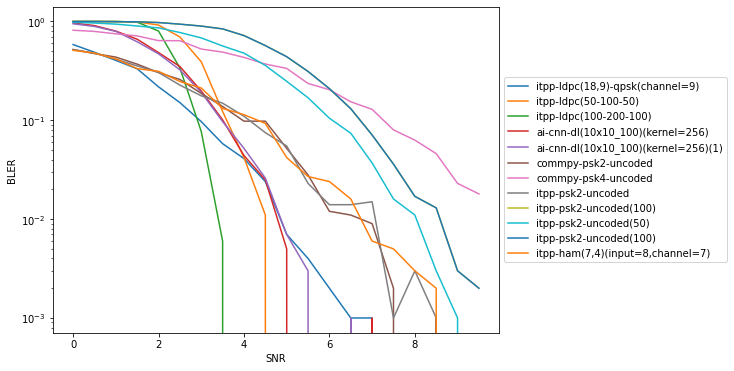

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-cnn-dl(10x10_100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-cnn-dl(10x10_100)(kernel=256)(1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR

ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
#ax2.plot(snrs,times_per_iter_pyldpc,'', label="pyldpc") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_tensor,'', label="tensor") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_awgn,'', label="commpy-awgn") # plot decode timing for different SNRs
#ax2.set_xlabel('$E_b/$N_0$')
#ax2.set_ylabel('Decoding Time [s]')
#ax2.annotate('Total Runtime: pyldpc:{:03.2f}s awgn:{:03.2f}s tensor:{:03.2f}s'.format(numpy.sum(times_per_iter_pyldpc), 
#            numpy.sum(times_per_iter_awgn), numpy.sum(times_per_iter_tensor)),
#            xy=(1, 0.35), xycoords='axes fraction',
#            xytext=(-20, 20), textcoords='offset pixels',
#            horizontalalignment='right',
#            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

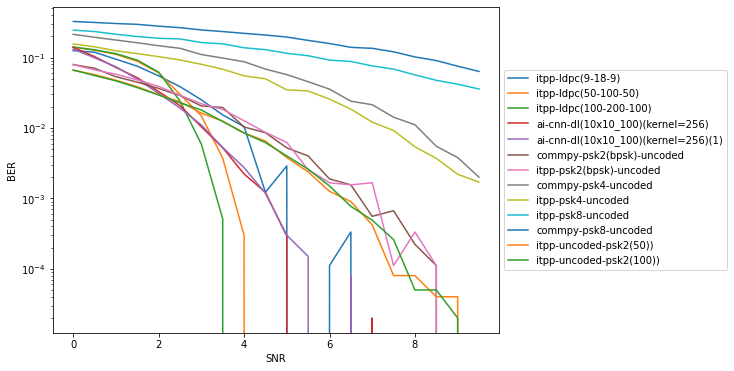

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-cnn-dl(10x10_100)(kernel=256)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-cnn-dl(10x10_100)(kernel=256)(1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR

#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

14.141308


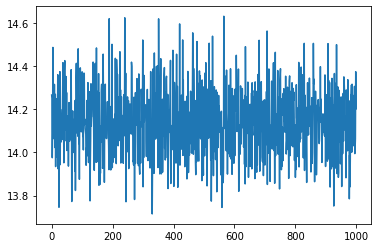

In [11]:
encoded_message = encoder.predict(training_input_message_one_hot)
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message), axis=1))
plt.plot(x)
print (numpy.mean(x))

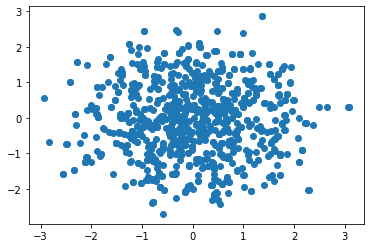

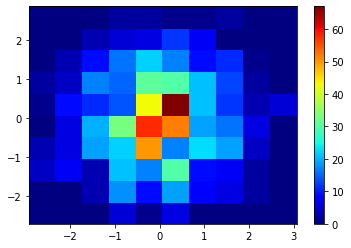

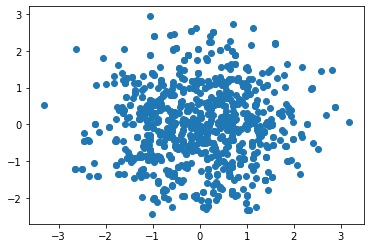

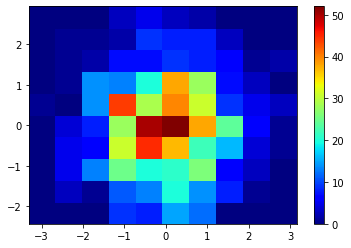

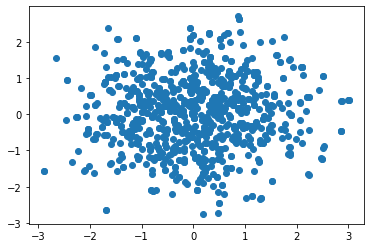

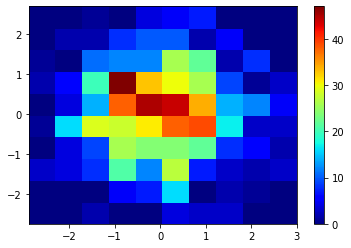

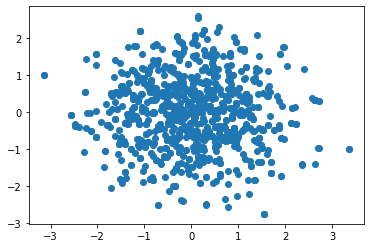

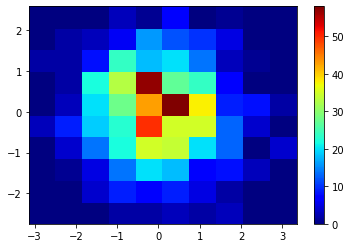

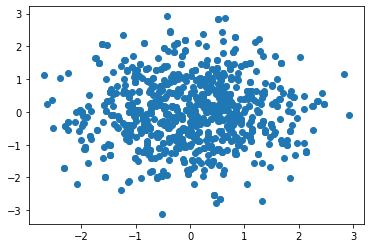

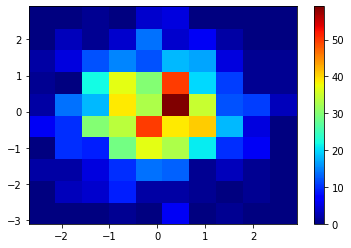

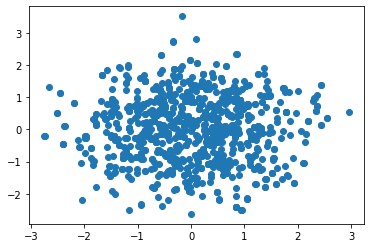

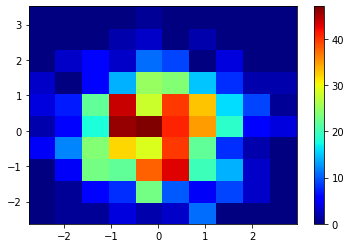

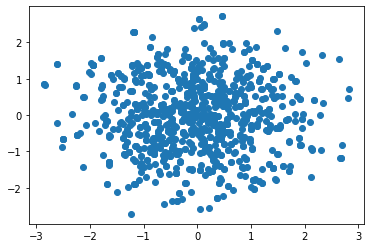

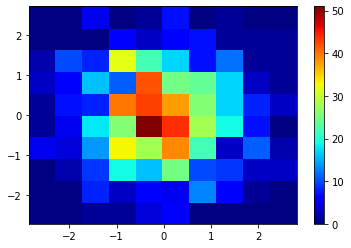

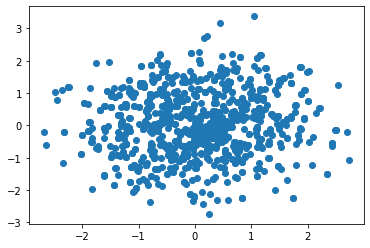

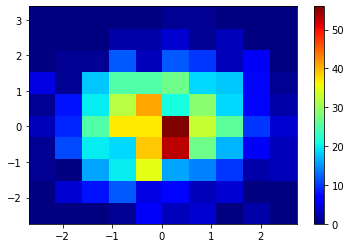

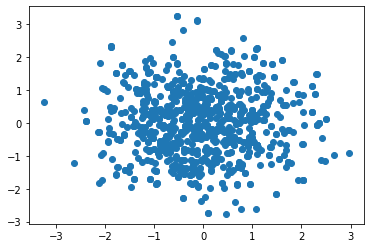

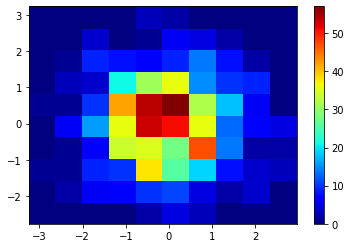

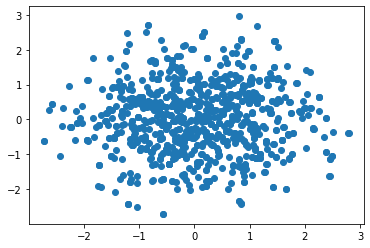

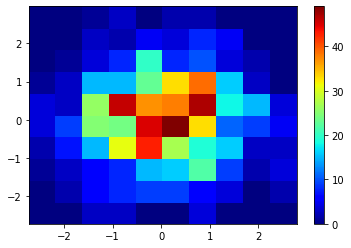

In [12]:
import matplotlib.pyplot as plt
encoded_message = encoder.predict(training_input_message_one_hot)
channel_in_array = numpy.transpose(encoded_message)
for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

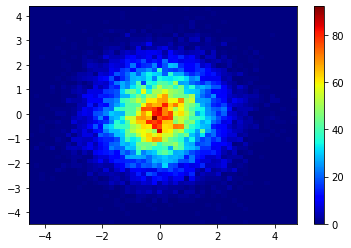

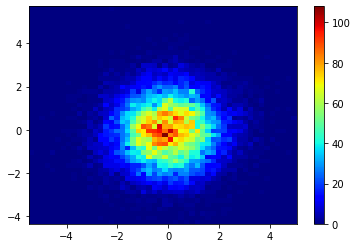

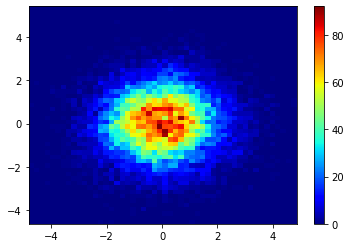

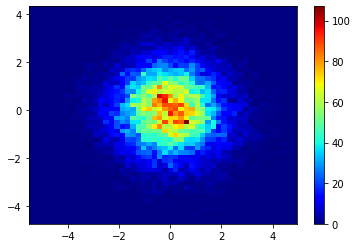

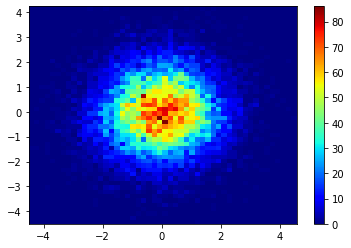

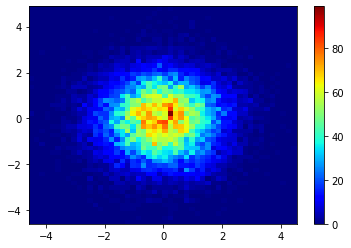

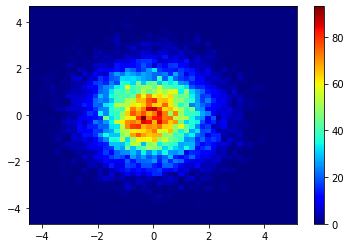

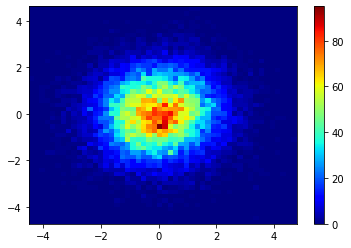

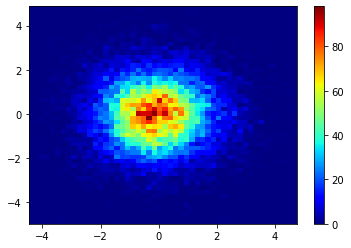

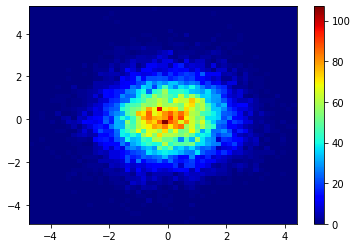

In [13]:
channel_out_array = numpy.transpose(channel_out1)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

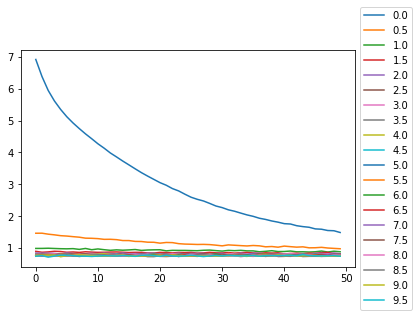

In [14]:
for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
  plt.plot(training_history1[snr].history['loss'], label=snr)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
print (test_input_message_one_hot.shape)
ber_per_iter_dl_tensor2, bler_per_iter_dl_tensor2, channel_out2  = get_block_onehot_ber_bler_of_model (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE), 
          encoder, decoder, 
          test_input_message_one_hot, 
          test_input_message, 
          test_input_message_one_hot.shape[0], test_input_message_one_hot.shape[1],
          int(numpy.math.log2(test_input_message_one_hot.shape[2])),
          channel_size*num_of_input_block)
print (ber_per_iter_dl_tensor2)
print (bler_per_iter_dl_tensor2)

(1000, 10, 1024)
SNR: 0.000:-> BLER: 0.94800 BER: 0.13573 
total_bit_error: 13573
total_msg_error: 948
SNR: 0.500:-> BLER: 0.91600 BER: 0.10796 
total_bit_error: 10796
total_msg_error: 916
SNR: 1.000:-> BLER: 0.82300 BER: 0.07912 
total_bit_error: 7912
total_msg_error: 823
SNR: 1.500:-> BLER: 0.68100 BER: 0.05469 
total_bit_error: 5469
total_msg_error: 681
SNR: 2.000:-> BLER: 0.51900 BER: 0.03534 
total_bit_error: 3534
total_msg_error: 519
SNR: 2.500:-> BLER: 0.36400 BER: 0.02192 
total_bit_error: 2192
total_msg_error: 364
SNR: 3.000:-> BLER: 0.21300 BER: 0.01176 
total_bit_error: 1176
total_msg_error: 213
SNR: 3.500:-> BLER: 0.12400 BER: 0.00633 
total_bit_error: 633
total_msg_error: 124
SNR: 4.000:-> BLER: 0.06500 BER: 0.00351 
total_bit_error: 351
total_msg_error: 65
SNR: 4.500:-> BLER: 0.02300 BER: 0.00126 
total_bit_error: 126
total_msg_error: 23
SNR: 5.000:-> BLER: 0.01500 BER: 0.00084 
total_bit_error: 84
total_msg_error: 15
SNR: 5.500:-> BLER: 0.00400 BER: 0.00025 
total_bit_er

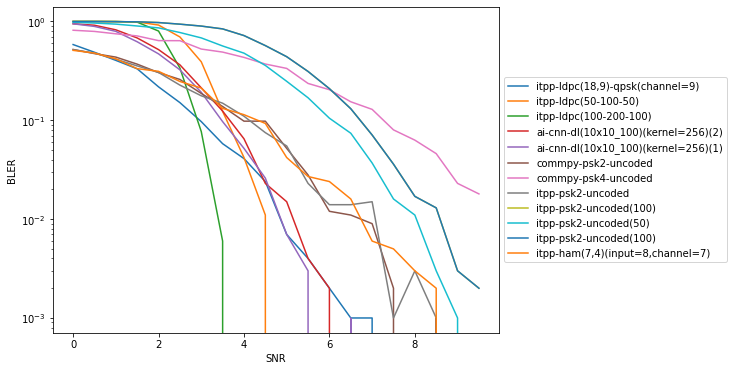

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(18,9)-qpsk(channel=9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_50_100_itpp_psk_4,'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor2,'', label="ai-cnn-dl(10x10_100)(kernel=256)(2)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor1,'', label="ai-cnn-dl(10x10_100)(kernel=256)(1)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_50_itpp_psk_2,'', label="itpp-psk2-uncoded(50)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_100_itpp_psk_2,'', label="itpp-psk2-uncoded(100)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR

ax1.set_ylabel('BLER')
ax1.set_xlabel('SNR')
#ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
#ax2.plot(snrs,times_per_iter_pyldpc,'', label="pyldpc") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_tensor,'', label="tensor") # plot decode timing for different SNRs
#ax2.plot(snrs,times_per_iter_awgn,'', label="commpy-awgn") # plot decode timing for different SNRs
#ax2.set_xlabel('$E_b/$N_0$')
#ax2.set_ylabel('Decoding Time [s]')
#ax2.annotate('Total Runtime: pyldpc:{:03.2f}s awgn:{:03.2f}s tensor:{:03.2f}s'.format(numpy.sum(times_per_iter_pyldpc), 
#            numpy.sum(times_per_iter_awgn), numpy.sum(times_per_iter_tensor)),
#            xy=(1, 0.35), xycoords='axes fraction',
#            xytext=(-20, 20), textcoords='offset pixels',
#            horizontalalignment='right',
#            verticalalignment='bottom')
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

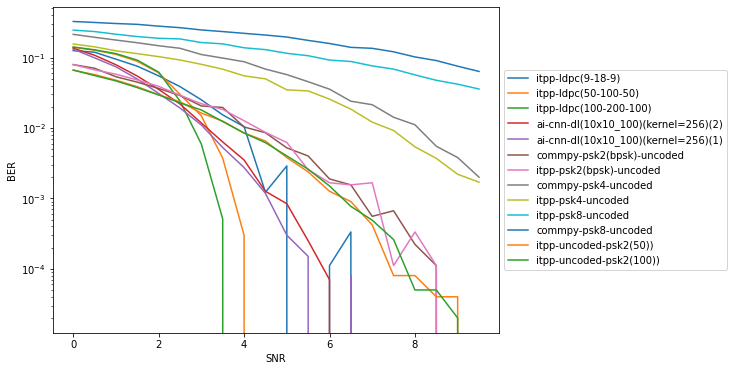

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_50_100_itpp_psk_4[5:25],'', label="itpp-ldpc(50-100-50)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_ldpc_100_200_itpp_psk_4[5:25],'', label="itpp-ldpc(100-200-100)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor2,'', label="ai-cnn-dl(10x10_100)(kernel=256)(2)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor1,'', label="ai-cnn-dl(10x10_100)(kernel=256)(1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_50_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(50))") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_100_itpp_psk_2[5:25],'', label="itpp-uncoded-psk2(100))") # plot BER vs SNR

#ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
#ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_xlabel('SNR')
#ax1.set_title('CNN-AE ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
#plt.legend ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()